# Insurance Claims- Fraud Detection

## Problem Statement:

### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\Data Science Certificates\Evaluation project\Insurance Claims- Fraud Detection\Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.shape

(1000, 40)

We have total 1000 rows and 40 huge range of columns

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

* policy_csl column has some new kind of data which we need to covert in numeric format
* _c39 looks all columns blank so we can delete that column
* I see some question mark in police_report_available

In [6]:
# I am droping policy_number from data sent as it is always unique for all policies

df.drop("policy_number",axis=1,inplace=True)

In [7]:
df.sample(3)

months_as_customer  age policy_bind_date policy_state policy_csl  \
691                 199   38       26-09-1991           IL    250/500   
851                 282   43       19-07-2006           OH    250/500   
756                  92   32       29-01-1998           IL   500/1000   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
691               1000                1281.25               0       467780   
851                500                1452.27               0       611996   
756                500                1592.41               0       474324   

    insured_sex  ... police_report_available total_claim_amount injury_claim  \
691      FEMALE  ...                      NO              44440         8080   
851        MALE  ...                      NO              46800         4680   
756        MALE  ...                     YES              53400         5340   

    property_claim  vehicle_claim  auto_make auto_model auto_year  \
691           4040          32320        BMW         X6      2007   
851           9360          32760       Audi         A5      2007   
756           5340          42720       Jeep   Wrangler      1996   

    fraud_reported _c39  
691              Y  NaN  
851              Y  NaN  
756              N  NaN  

[3 rows x 39 columns]

In [8]:
#Let us check the name of our columns
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

We can see above there is no duplicate raws are present in dataset

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

We can see that _c39 has 1000 null values that meansn not single data is present in dataset in this columns 

In [11]:
# Droping _c39

df.drop("_c39",axis=1,inplace=True)

<AxesSubplot:>

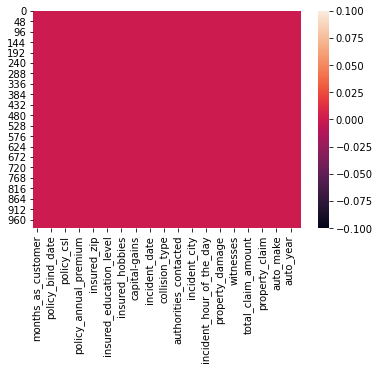

In [12]:
# Visaulize Null values on heatmap
sns.heatmap(df.isna())

Now we dont have any null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

**Observation**

* Data is taking total 297KB of memory
* There are object values present in dataset
* As we delected null columns so there is no null values are present

In [14]:
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

We can see above how many unique values are present in each column. I can see that "incident_location" has total 1000 unique values present that means every value is unique so I will drop this column as our ML model will not be able to extract any insights from this columns

In [15]:
# Dropping "incident_location"

df.drop("incident_location",axis=1,inplace=True)

In [16]:
#Now Let us find the values of each Features in our data
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
****************************************************************************************************
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
****************************************************************************************************
28-04-1992    3
05-08-1992    3
01-01-2006    3
16-05-2008    2
29-09-1999    2
             ..
13-12-1993    1
16-11-2000    1
03-02-1993    1
21-12-2013    1
03-09-2008    1
Name: policy_bind_date, Length: 9

**Observation**

* collisison_type has "?" present
* Property_damage has "?" present 
* police_report_available "?: present

##### All above "?" we can represent with some meaning full name like "not_sure" ect

* Finally "fraud_reported" count of yes and no is imbalanced which we need to balance before train model

**Date formats**

* "policy_bind_date"
* "incident_date"

In [17]:
# First we will treat "?" by filling some word there just to have meaning 

df['collision_type']=df['collision_type'].replace("?","not_sure")

In [18]:
df['property_damage']=df['property_damage'].replace("?","not_sure")
df['police_report_available']=df['police_report_available'].replace("?","not_sure")


In [19]:
col=['collision_type','property_damage','police_report_available']

for i in col:
        print(df[i].value_counts())
        print('*'*100)

Rear Collision     292
Side Collision     276
Front Collision    254
not_sure           178
Name: collision_type, dtype: int64
****************************************************************************************************
not_sure    360
NO          338
YES         302
Name: property_damage, dtype: int64
****************************************************************************************************
NO          343
not_sure    343
YES         314
Name: police_report_available, dtype: int64
****************************************************************************************************


We have replaced "?"  now

### Lets treat date formats now

In [20]:
# Datetime for policy_bind_date
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [21]:
# we will drop original "policy_bind_date" as we already extracted dates
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... injury_claim property_claim vehicle_claim  \
0                        MD  ...         6510          13020         52080   
1                        MD  ...          780            780          3510   
2                       PhD  ...         7700           3850         23100   
3                       PhD  ...         6340           6340         50720   
4                 Associate  ...         1300            650          4550   
..                      ...  ...          ...            ...           ...   
995                 Masters  ...        17440           8720         61040   
996                     PhD  ...        18080          18080         72320   
997                 Masters  ...         7500           7500         52500   
998               Associate  ...         5220           5220         36540   
999               Associate  ...          460            920          3680   

      auto_make  auto_model auto_year fraud_reported Month  Year Day  
0          Saab         92x      2004              Y    10  2014  17  
1      Mercedes        E400      2007              Y     6  2006  27  
2         Dodge         RAM      2007              N     6  2000   9  
3     Chevrolet       Tahoe      2014              Y     5  1990  25  
4        Accura         RSX      2009              N     6  2014   6  
..          ...         ...       ...            ...   ...   ...  ..  
995       Honda      Accord      2006              N     7  1991  16  
996  Volkswagen      Passat      2015              N     5  2014   1  
997      Suburu     Impreza      1996              N     2  2003  17  
998        Audi          A5      1998              N    11  2011  18  
999    Mercedes        E400      2007              N    11  1996  11  

[1000 rows x 39 columns]

In [22]:
# Datetime for incident_date

df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_Month'] = pd.DatetimeIndex(df['incident_date']).month
df['incident_ear'] = pd.DatetimeIndex(df['incident_date']).year
df['incident_Day'] = df['incident_date'].dt.day


In [23]:
df['incident_ear'].value_counts()

2015    1000
Name: incident_ear, dtype: int64

In [24]:
# As Incisent_ear has only one year I will drop this columns 

df.drop('incident_ear',axis=1,inplace=True)

In [25]:
# Getting object data
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n ",object_datatype)

# getting integers data
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_datatype)

Object Data Type Columns are:
  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Month', 'Year', 'Day', 'incident_Month', 'incident_Day']


I have just separated columns on basis od Datatypes just because if required in visualization purpose

Single digit category column name: fraud_reported


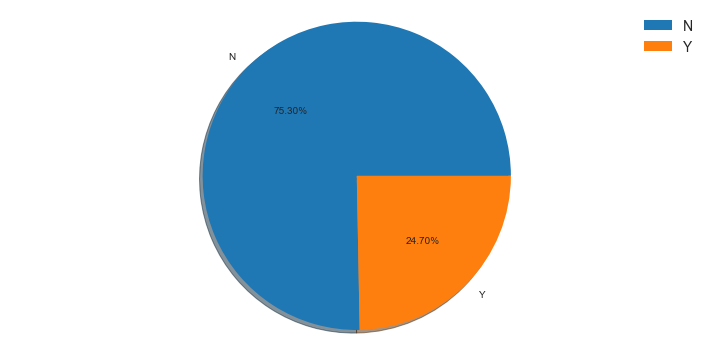

Single digit category column name: insured_sex


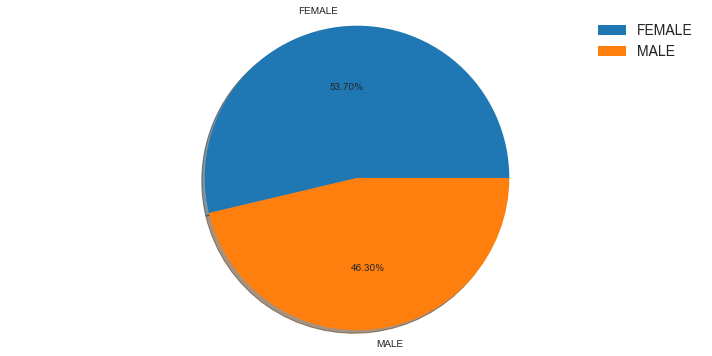

Single digit category column name: policy_state


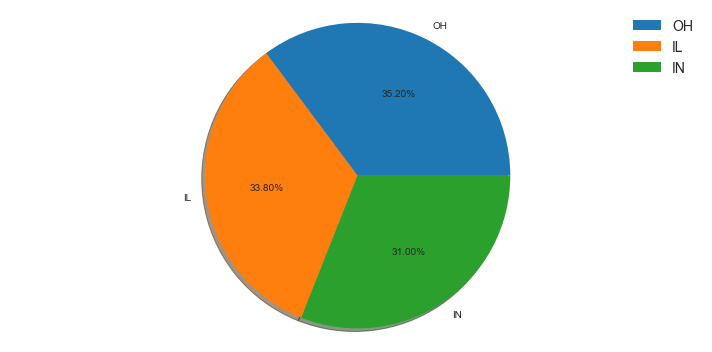

Single digit category column name: policy_csl


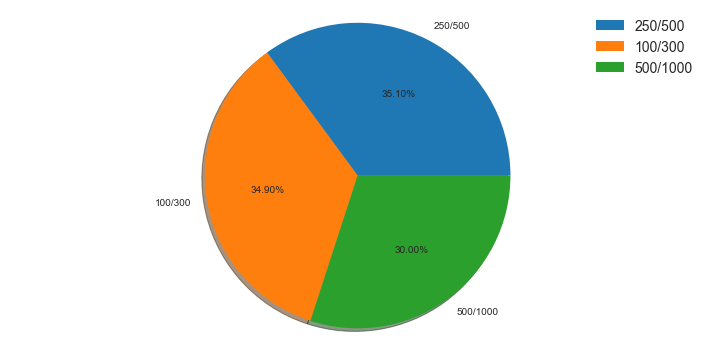

Single digit category column name: policy_deductable


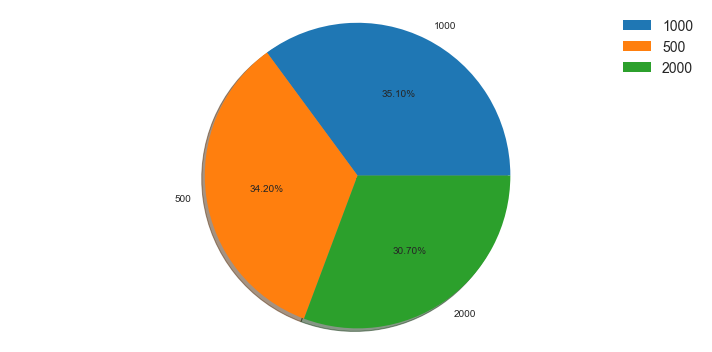

Single digit category column name: bodily_injuries


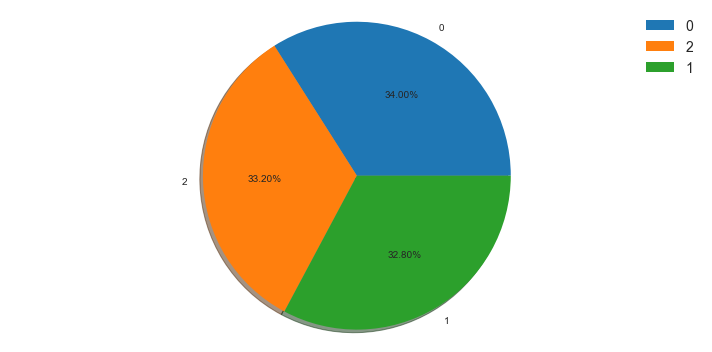

Single digit category column name: police_report_available


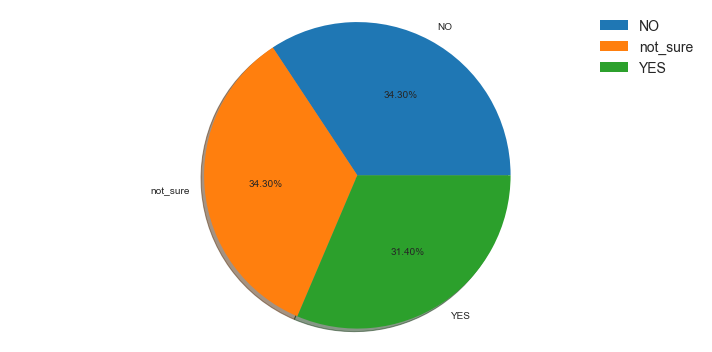

Single digit category column name: property_damage


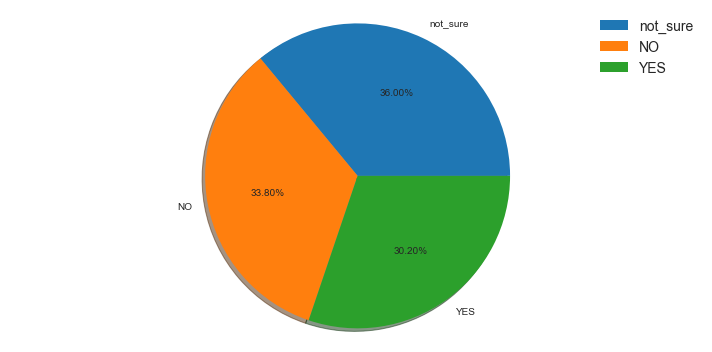

Single digit category column name: incident_type


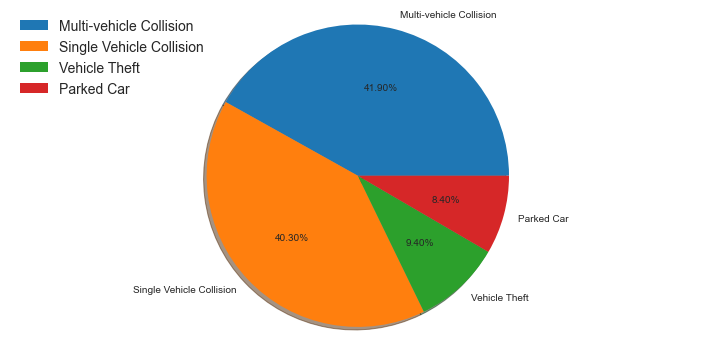

Single digit category column name: collision_type


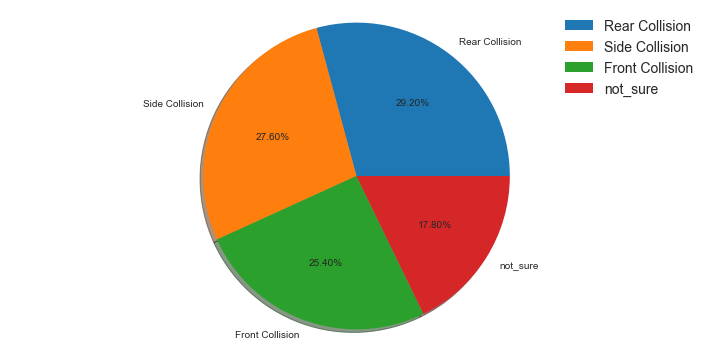

Single digit category column name: incident_severity


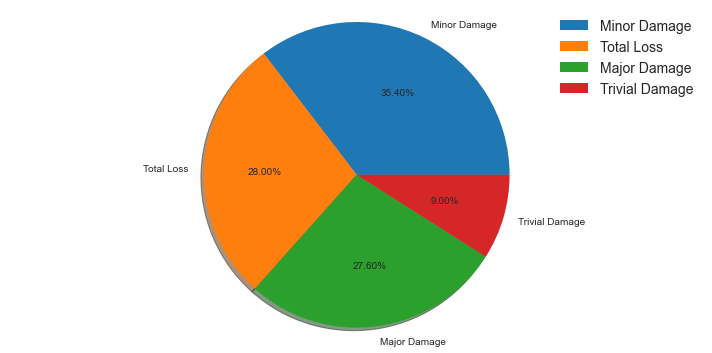

Single digit category column name: number_of_vehicles_involved


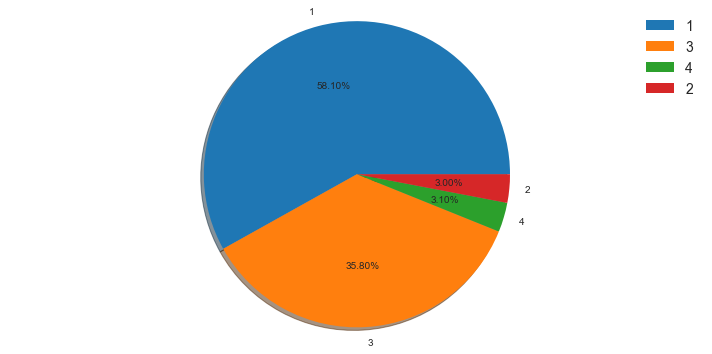

Single digit category column name: witnesses


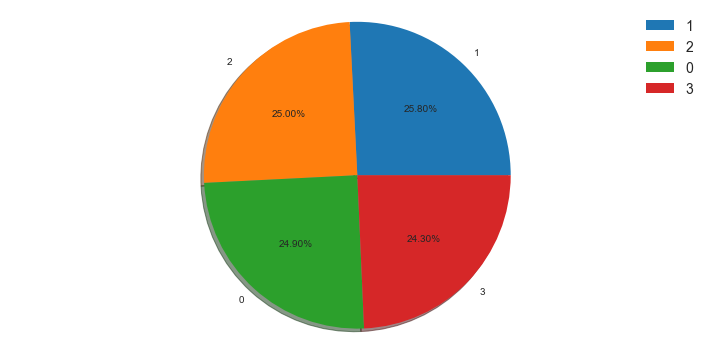

Single digit category column name: authorities_contacted


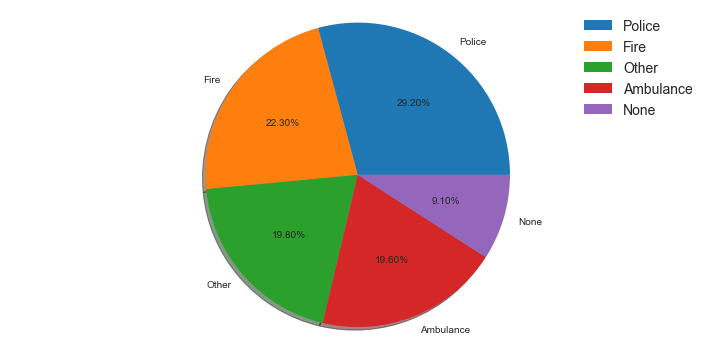

Single digit category column name: insured_relationship


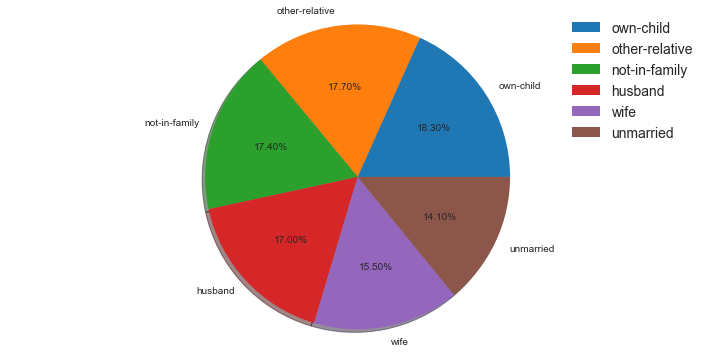

Single digit category column name: insured_education_level


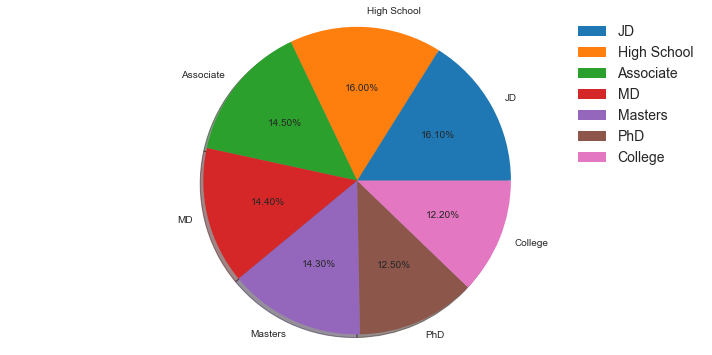

Single digit category column name: incident_state


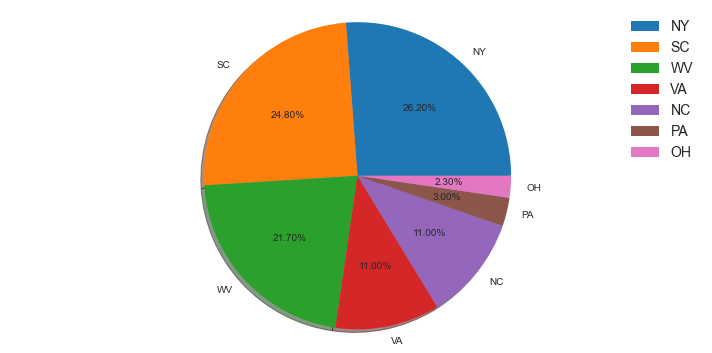

Single digit category column name: incident_city


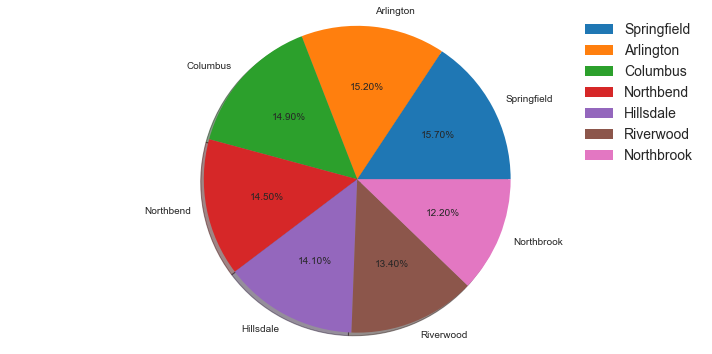

In [26]:
def pie_chart(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(f"Single digit category column name:", i)
    pie_chart(df[i])

**Observation**

* we can see approx 24% of data has fraud activity which we need  tp balance
* Female has more contribution in policy as we can see female percentages are upto 53%
* Maximum policy are from OH state
* policy deductable is high in 1000 range
* 65 % pepole are saying that they are bodily_injured
* Many of them approx 34% cliams dont have police report available
* we have 30% property damage and 33% no damage 
* In incidant type we can see Parked car vehicle incidant ahe very less, they are only 8 % howeever multivehicle collision is high in range upto 41%
* Rear collosion is high in percentage as we can see it is upto 29%
* 58% data says that there were single vehicle involved
* Witness are equally distributed
* We can see that most of incident or highest incident rate is in NY state followed by SC
* Springfield city has highest rate of incident as we can see upto 15 % incident from this city



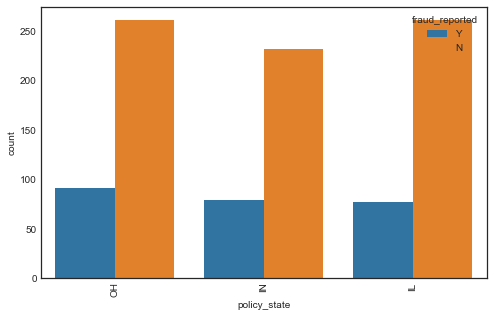

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['policy_state'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

We can see fraud cases are high in OH state and for other two state they are almost same

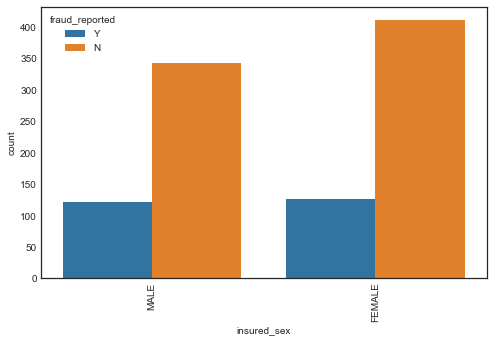

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

Female have done more fraudelent activity as we can see in above plot

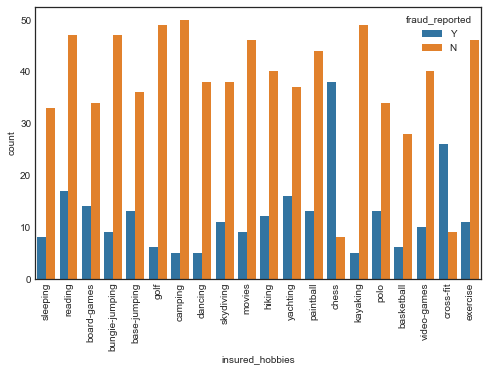

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['insured_hobbies'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

We can see fraud in high in Chess catagory

# Bivariate Analysis

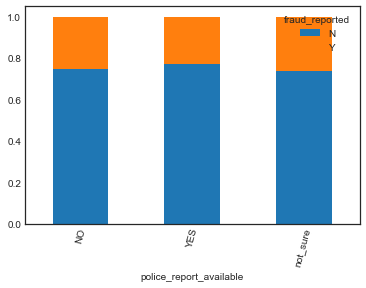

In [30]:
ba = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ba.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Those who dont have polivy report they might be potentila frauds as we can see count is hight in above graph

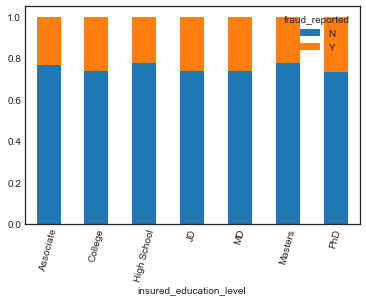

In [31]:
ba = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ba.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

College students and Phd educated are highest contribution in Fraud

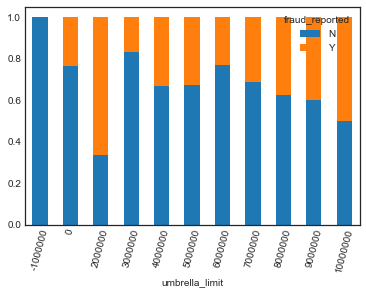

In [32]:
ba = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ba.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Those who are having high umbrella_limit they are high in fraud count

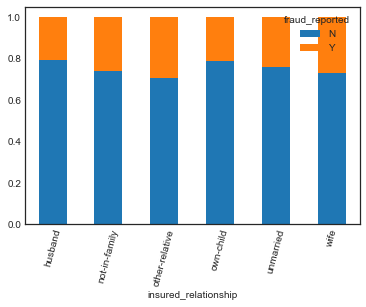

In [33]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Other relative has high chance of fraud

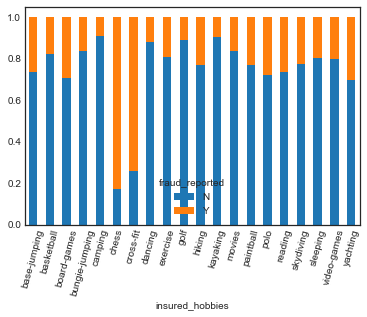

In [34]:
tf = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
tf.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Chess and cross fit has high chnace of fraud

Plotting histogram to see distribution

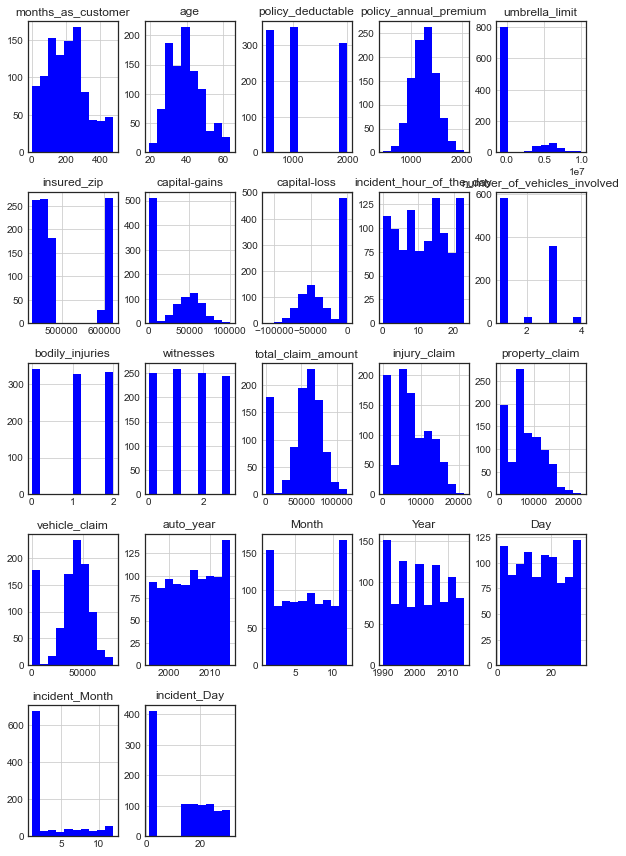

In [35]:
df.hist(figsize=(10,15),color = 'blue');

We can see that most of the data is normally distributed however some them are not like capital gain and month as customer

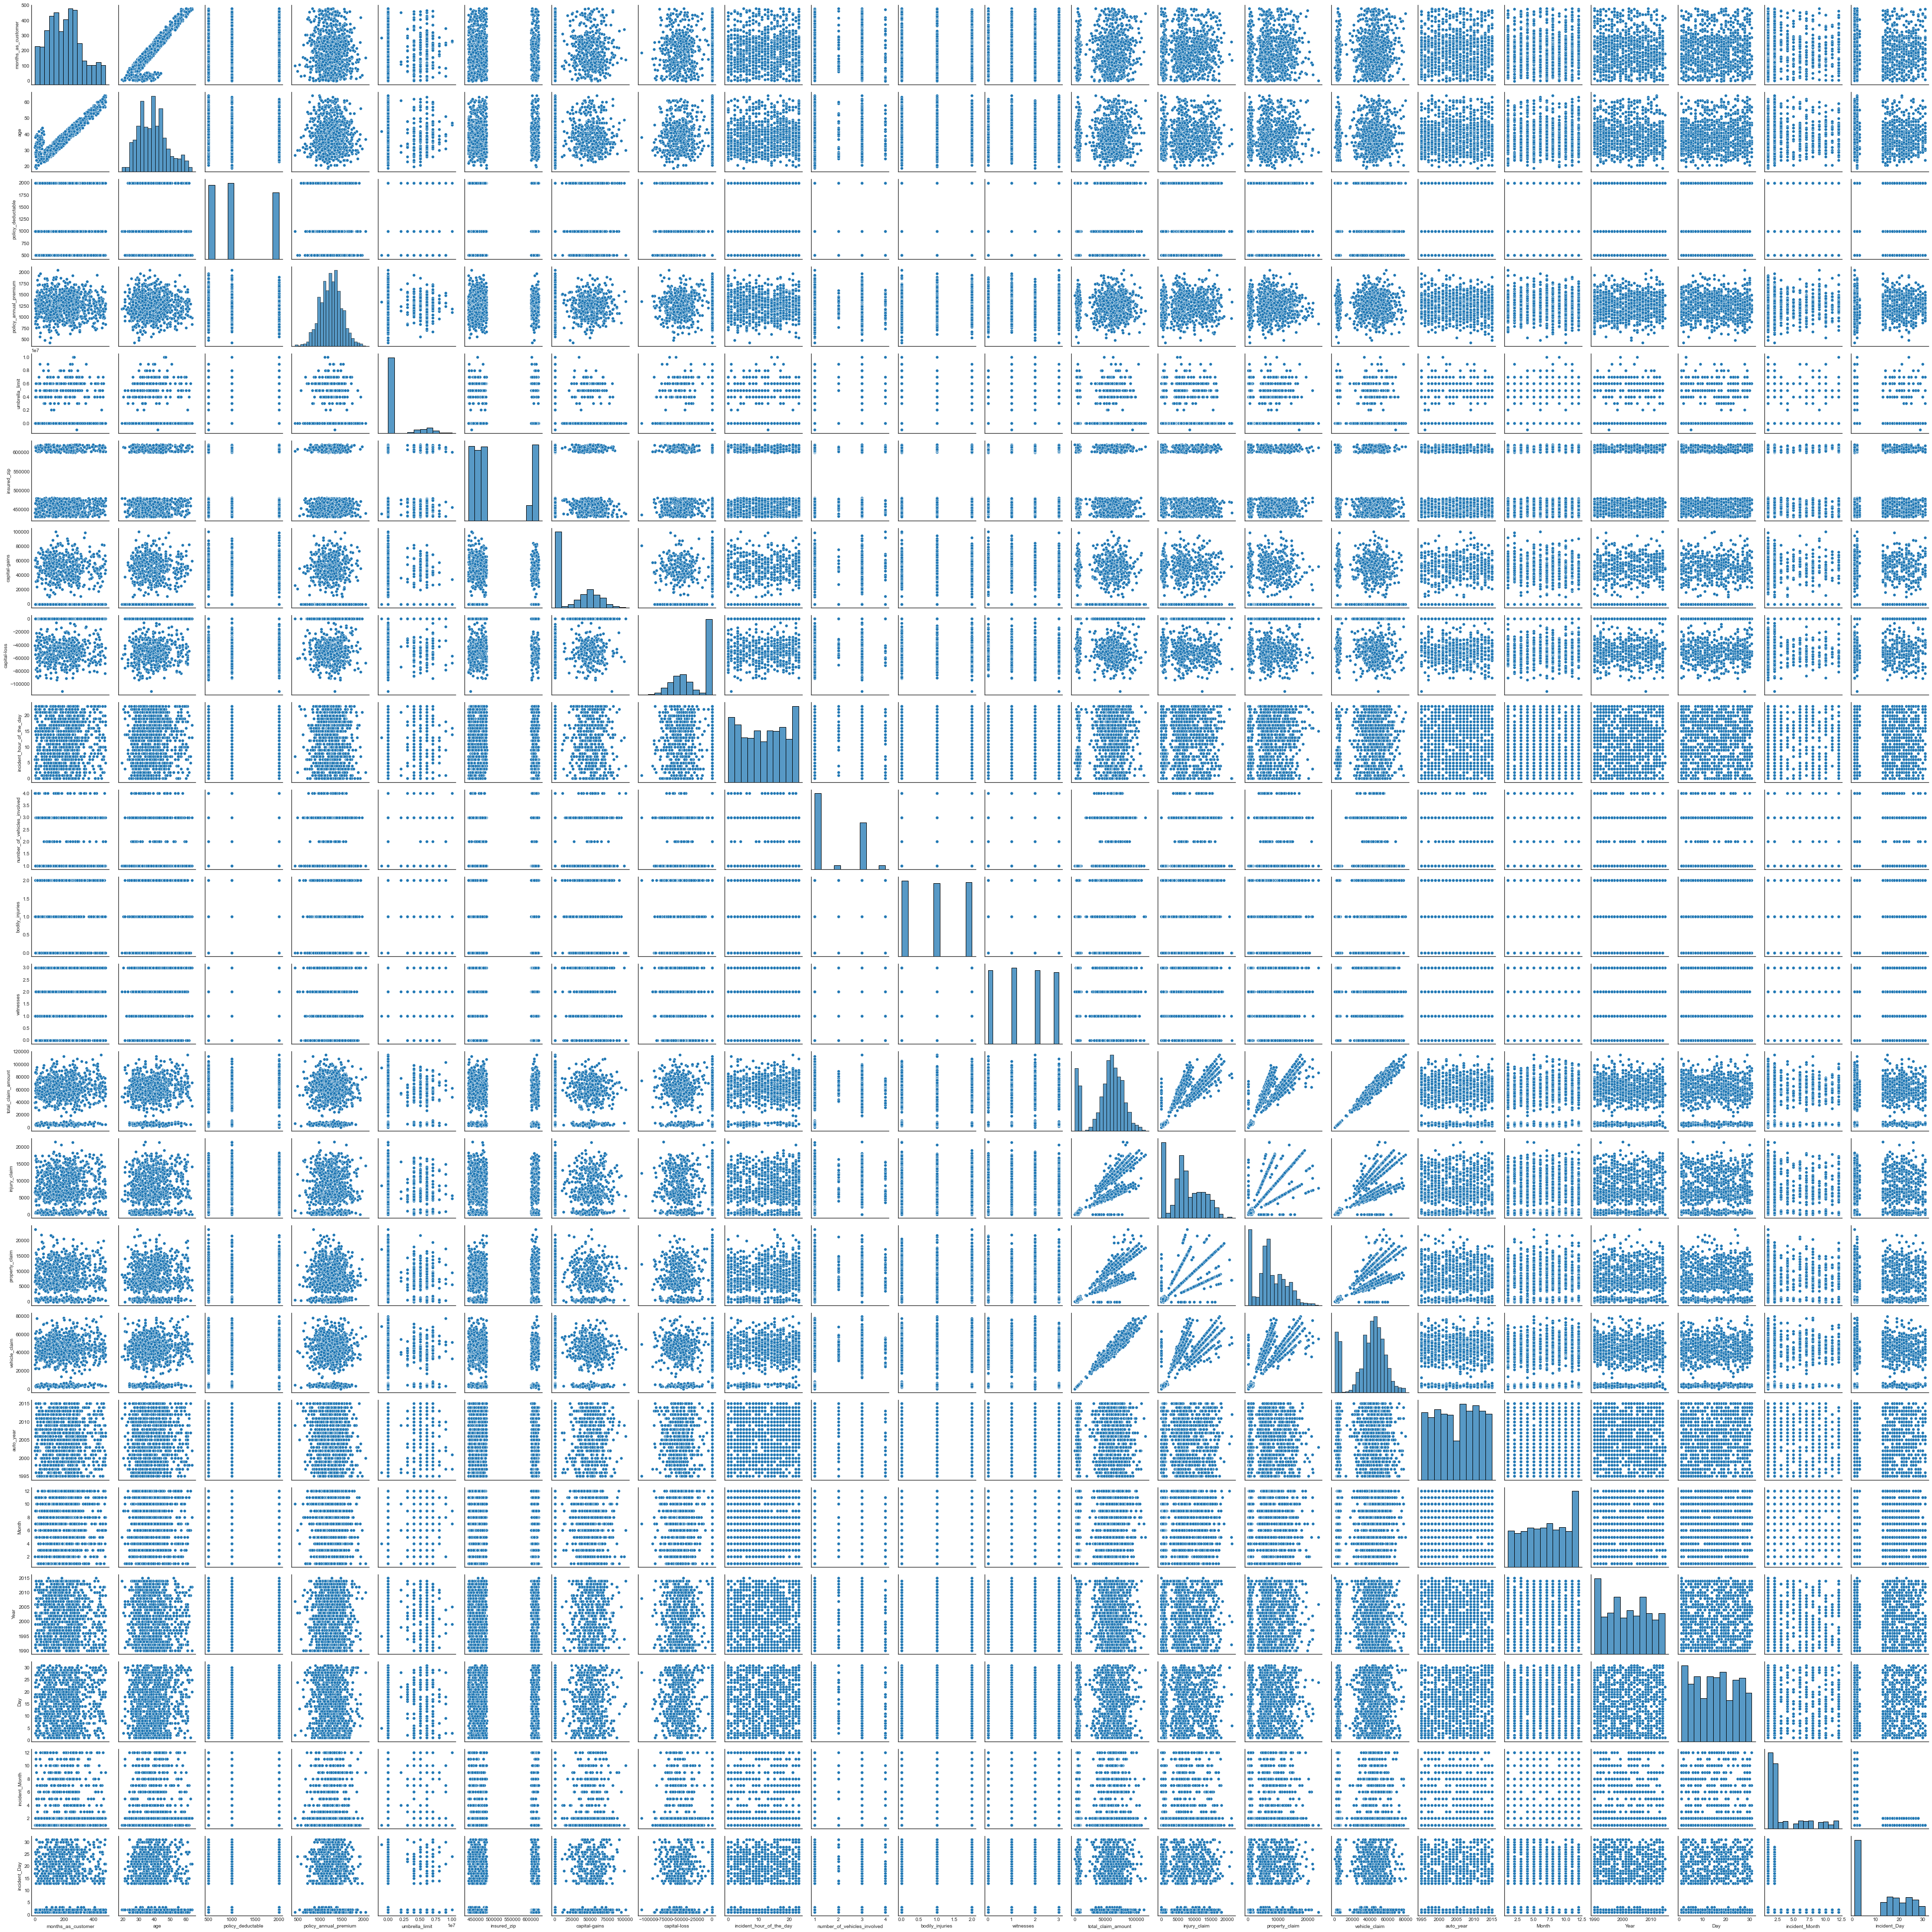

In [36]:
sns.pairplot(df)

I dont see any linear relation except age and month as customer. we can review relation of every column with each other to have better understanding of data

# Descriptive statistics

In [37]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
Month                        1000.0  6.559000e+00  3.391758e+00        1.00   
Year                         1000.0  2.001604e+03  7.360391e+00     1990.00   
Day                          1000.0  1.544800e+01  8.850176e+00        1.00   
incident_Month               1000.0  3.407000e+00  3.276291e+00        1.00   
incident_Day                 1000.0  1.308400e+01  1.044318e+01        1.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
Month                             4.0000       7.0       9.000        12.00  
Year                           1995.0000    2002.0    2008.000      2015.00  
Day                               8.0000      16.0      23.000        31.00  
incident_Month                    1.0000       2.0       5.000        12.00  
incident_Day                      2.0000      15.0      22.000        31.00

**Observation**

Below are some column where we can see outliers due to maz value is hight as compare to 25% to 75% range

* Total_claim_amount
* injury cliam
* umbrella_limit	
* months_as_customer

*****************************************

* Capital loss all values are in negative in below 50% qurtile range
* Capital gain is above 50% percentile range

# Encoding object using labelEncoder

In [38]:
objects = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'O':
        objects.append(i)

In [39]:
# Handling Objest using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in objects:
    df[i]=le.fit_transform(df[i].astype(str))

In [40]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted                   int32
incident_state                          int32
incident_city                     

We have converted our all data in numeric format from object

In [41]:
# Checking correlation for all colouns

df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.082966 -0.086068      0.037564   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                       -0.004631 -0.002733     -0.030719   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.071746 -0.063040     -0.024713   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   
Month                                  0.005750  0.015501      0.071450   
Year                                  -0.048276 -0.037444     -0.007276   
Day                                    0.051728  0.053869      0.002277   
incident_Month                         0.024659  0.023404      0.023643   
incident_Day                          -0.011092 -0.006131      0.014745   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium          0.023978          -0.003245   
umbrella_limit                 0.021636           0.010870   
insured_zip                    0.006879           0.004545   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_hobbies               -0.005960           0.004061   
insured_relationship          -0.030063          -0.022945   
capital-gains                  0.005249           0.035212   
capital-loss           

<AxesSubplot:>

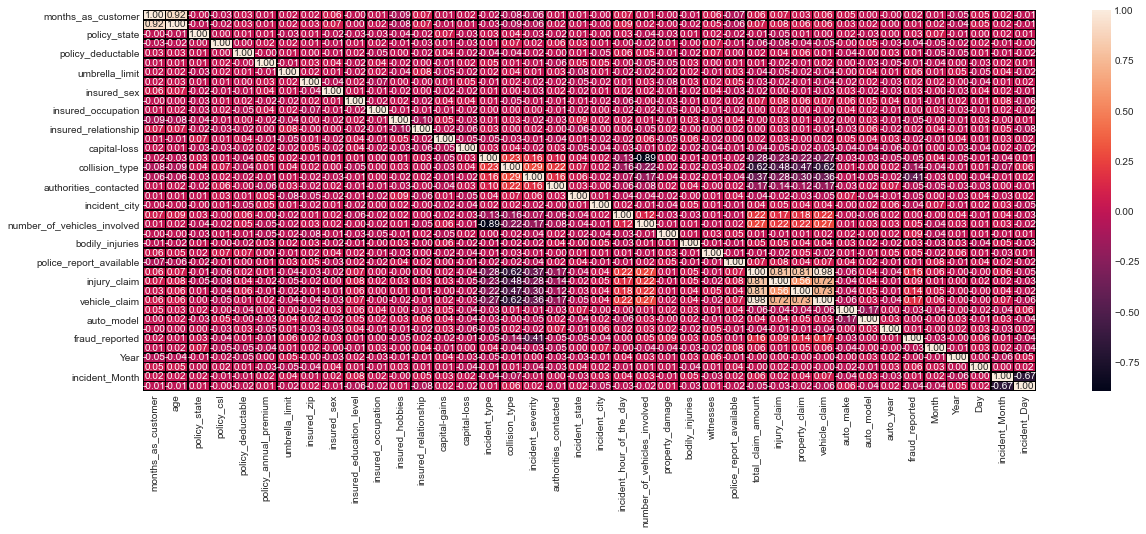

In [42]:
#As we see above all are correlation with each other and it is bit hard to understand hence we will plot these correlation on heatmap.

import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

In [43]:
#As we have huge range of column we will try to see correlation of all column with our target variable

df.corr()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.087639
Day                            0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_Month                 0.014495
age                            0.012143
insured_education_level        0.008808
police_report_available        0.008399
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720


# Plotting correlation on Bar plot

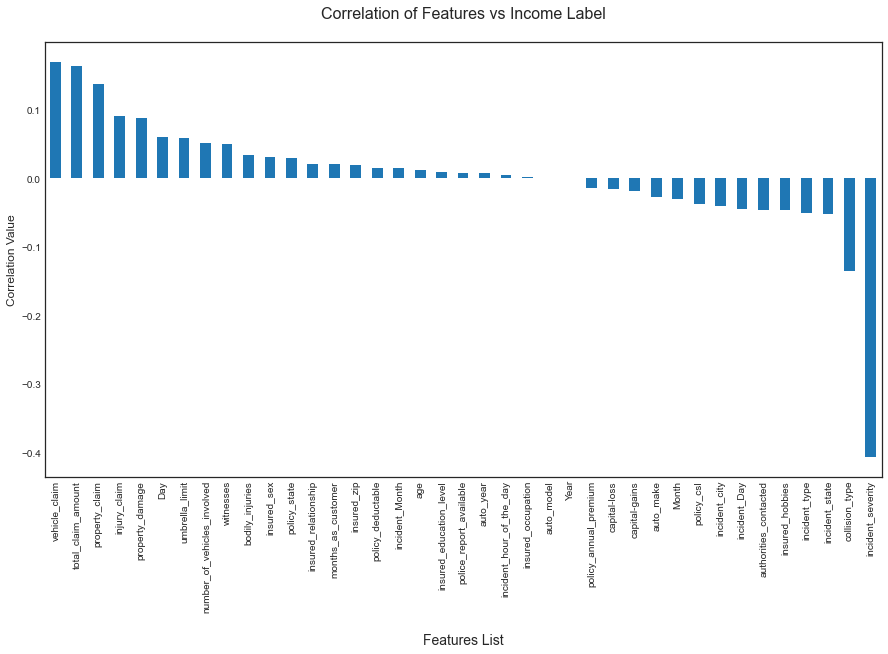

In [44]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

* We can see that half of the columns are postively correlated and more that 40% are negatively correlated we need both to traine model

#### I can see that there are some columns with almost zero correlation which I can drop from data set. They are as below

* Year
* auto_model
* insured_occupation


In [45]:
# Dropping no correalted columns

df.drop('Year',axis=1,inplace=True)
df.drop('auto_model',axis=1,inplace=True)
df.drop('insured_occupation',axis=1,inplace=True)

Done we have dropped uneccesary columns now

# Outliers Checking in Dataset

In [46]:
# We need to drop "incident_date" is date format is not allowed and we have already added extra columns for that

df.drop('incident_date',axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

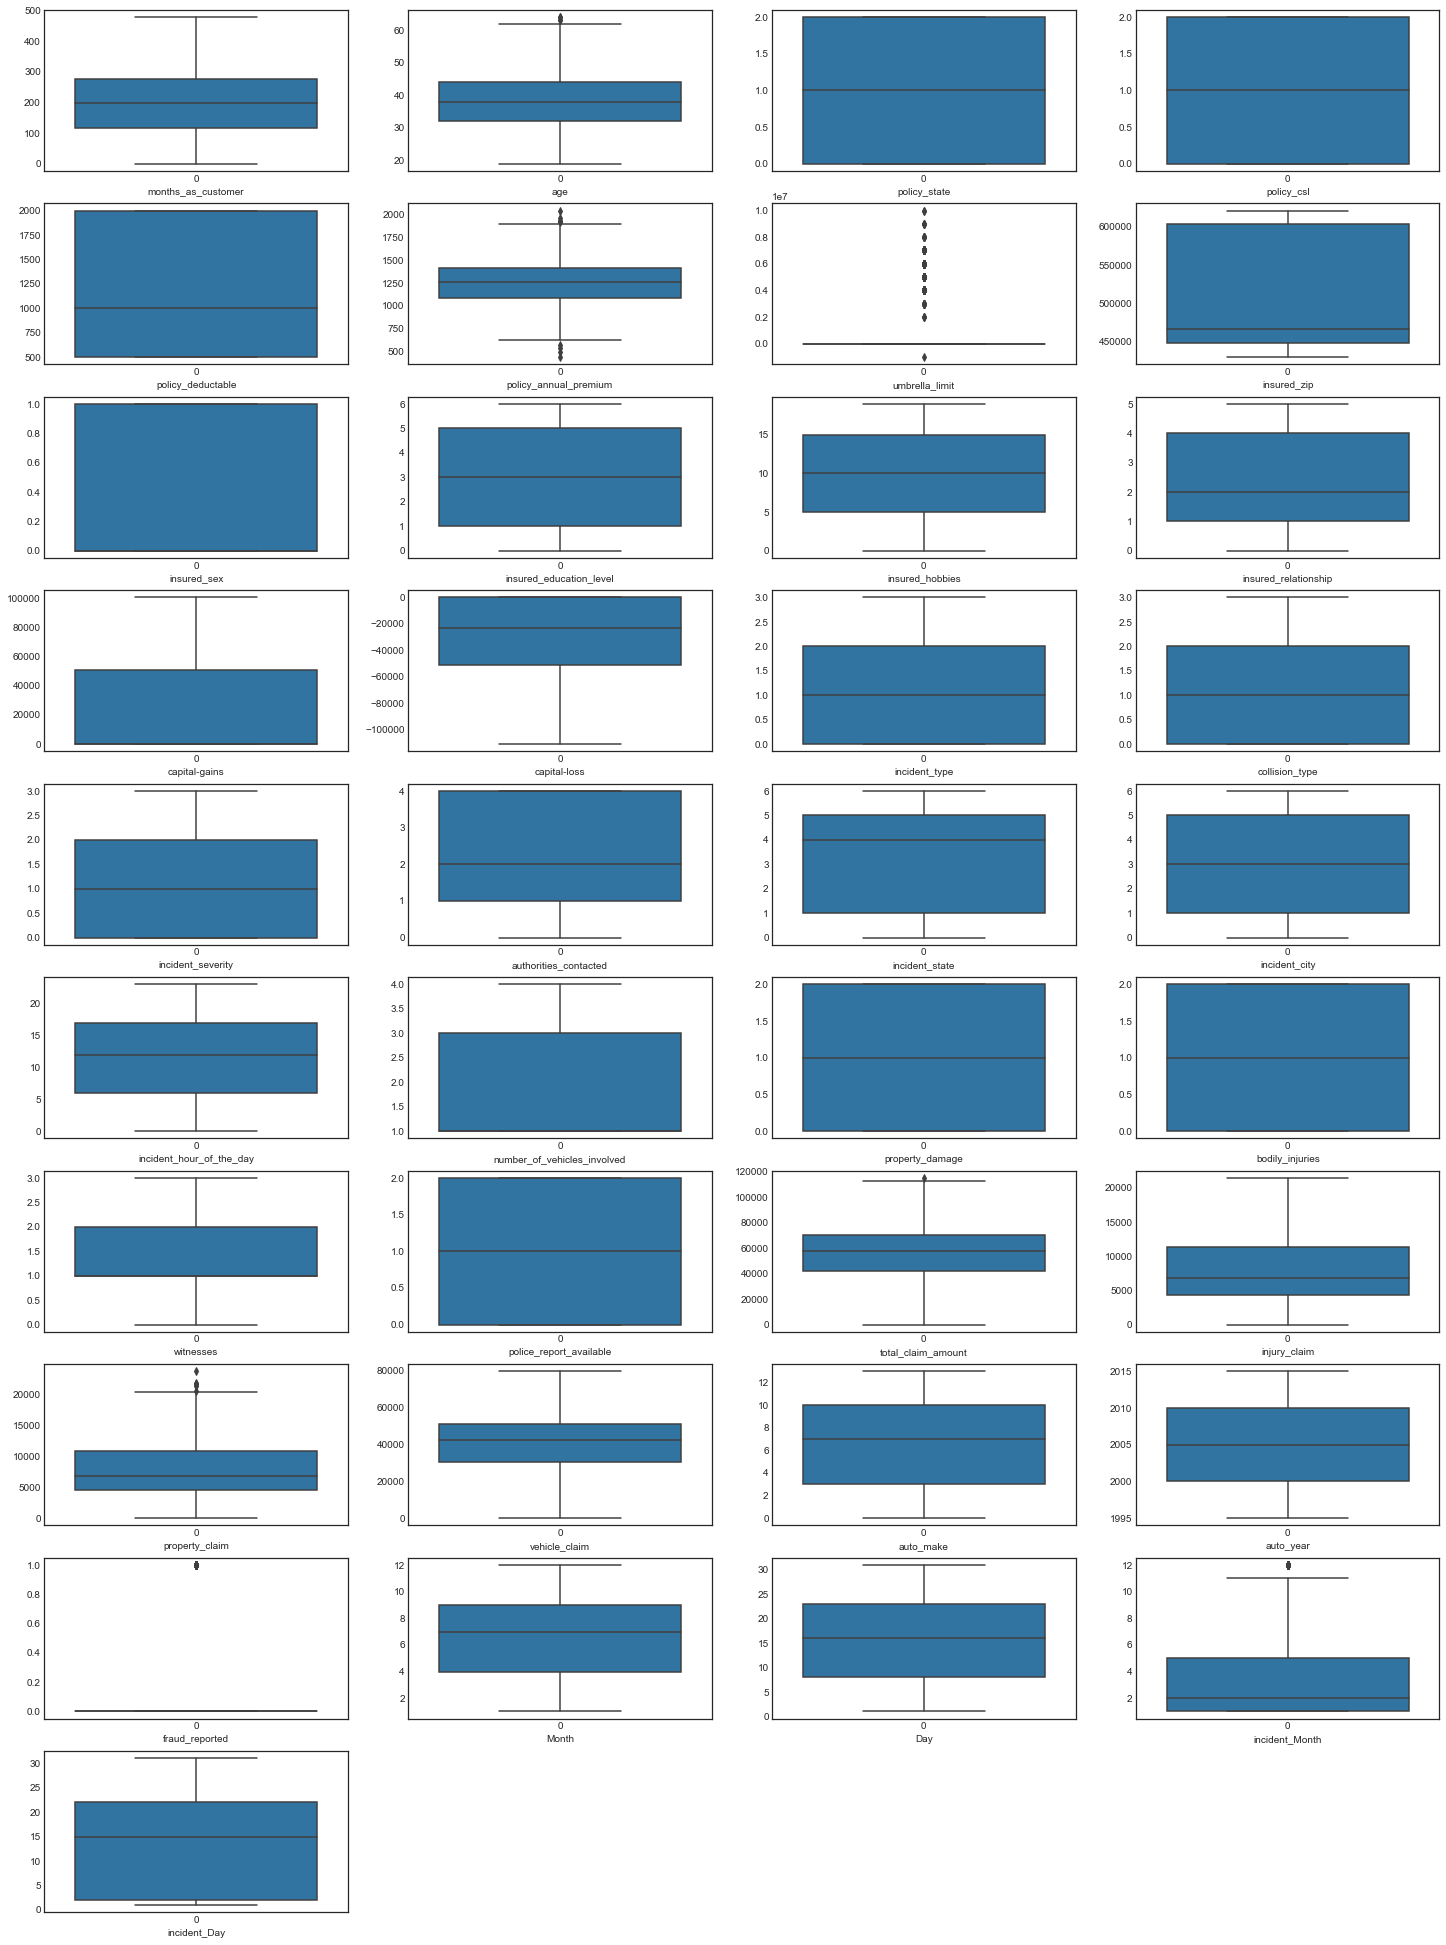

In [47]:
plt.figure(figsize=(25,35))

graph=1

for i in df:
    if graph<=38:
        plt.subplot(10,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

## Outliers detected in below columns

* age
* total claim amount
* incident_Month
* Property cliam

In [48]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [49]:
z.shape

(980, 37)

In [50]:
df.shape

(1000, 37)

In [51]:
loss=(1000-980)/1000*100
loss

2.0

#### 2% data loss is acceptable to remove outliers

In [52]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
            657, 700, 763, 807, 875, 922, 975],
           dtype='int64')

In [53]:
df.drop(dropindex,inplace=True)
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  injury_claim  property_claim  \
0                          4  ...          6510           13020   
1                          4  ...           780             780   
2                          6  ...          7700            3850   
3                          6  ...          6340            6340   
4                          0  ...          1300             650   
..                       ...  ...           ...             ...   
995                        5  ...         17440            8720   
996                        6  ...         18080           18080   
997                        5  ...          7500            7500   
998                        0  ...          5220            5220   
999                        0  ...           460             920   

     vehicle_claim  auto_make  auto_year  fraud_reported  Month  Day  \
0            52080         10       2004               1     10   17   
1             3510          8       2007               1      6   27   
2            23100          4       2007               0      6    9   
3            50720          3       2014               1      5   25   
4             4550          0       2009               0      6    6   
..             ...        ...        ...             ...    ...  ...   
995          61040          6       2006               0      7   16   
996          72320         13       2015               0      5    1   
997          52500         11       1996               0      2   17   
998          36540          1       1998               0     11   18   
999           3680          8       2007               0     11   11   

     incident_Month  incident_Day  
0                 1            25  
1                 1            21  
2                 2            22  
3                10             1  
4                 2            17  
..              ...           ...  
995               2            22  
996               1            24  
997               1            23  
998               2            26  
999               2            26  

[980 rows x 37 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

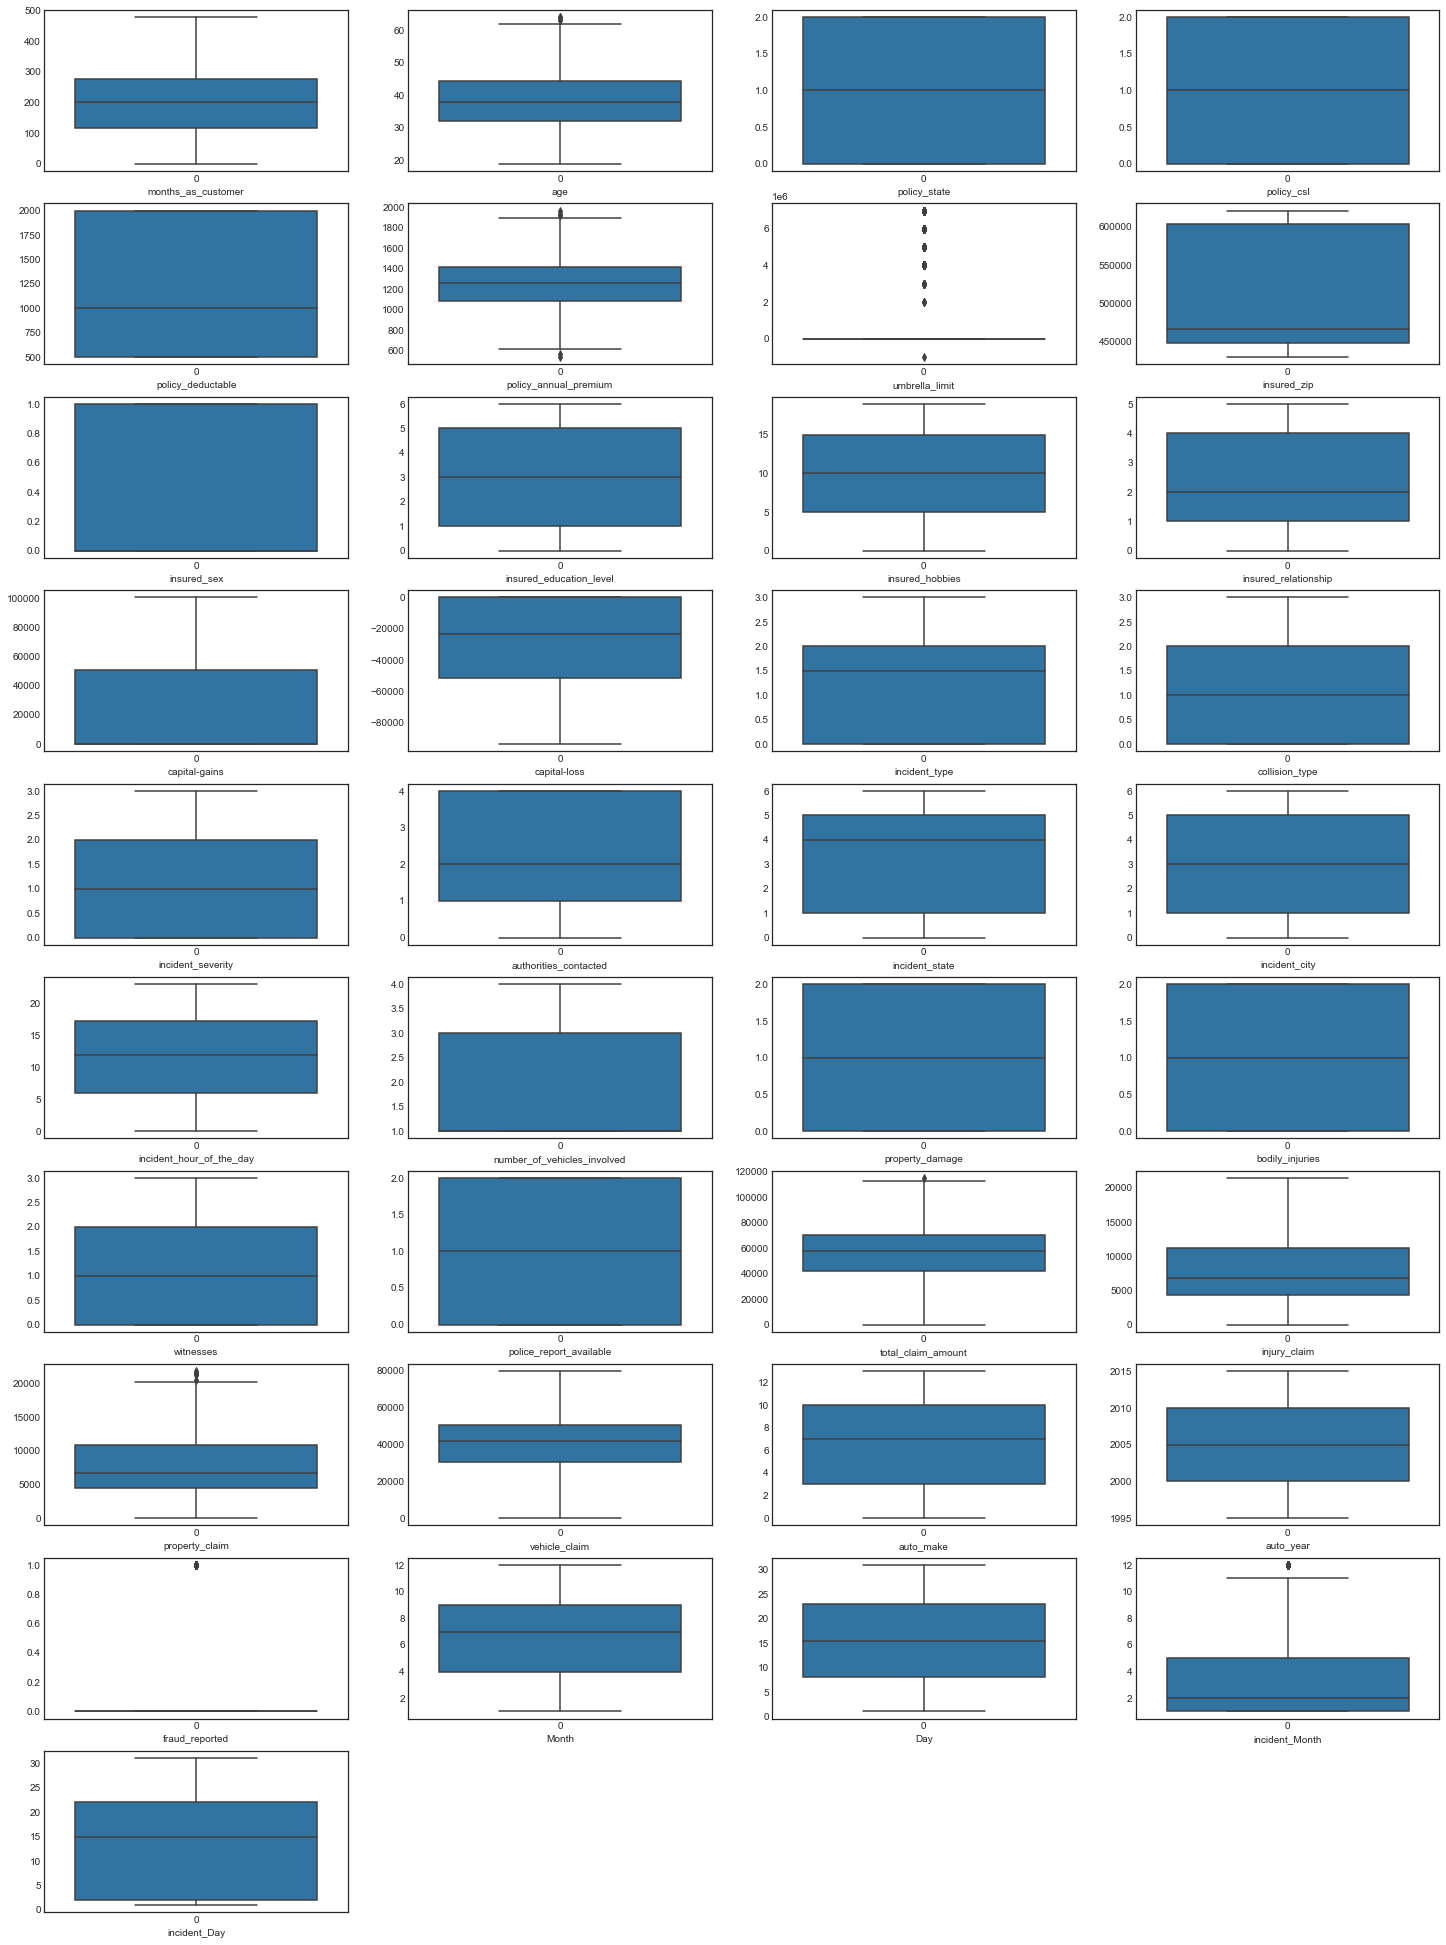

In [54]:
# Cheking after outliers removed

plt.figure(figsize=(25,35))

graph=1

for i in df:
    if graph<=38:
        plt.subplot(10,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Ok we handled up to possible level now we can go ahead

## We should check skewness of data before processing

In [56]:
number_datatype.remove('Year')

In [57]:
df[number_datatype].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
Month                         -0.024643
Day                            0.028152
incident_Month                 1.388336
incident_Day                   0.055443
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

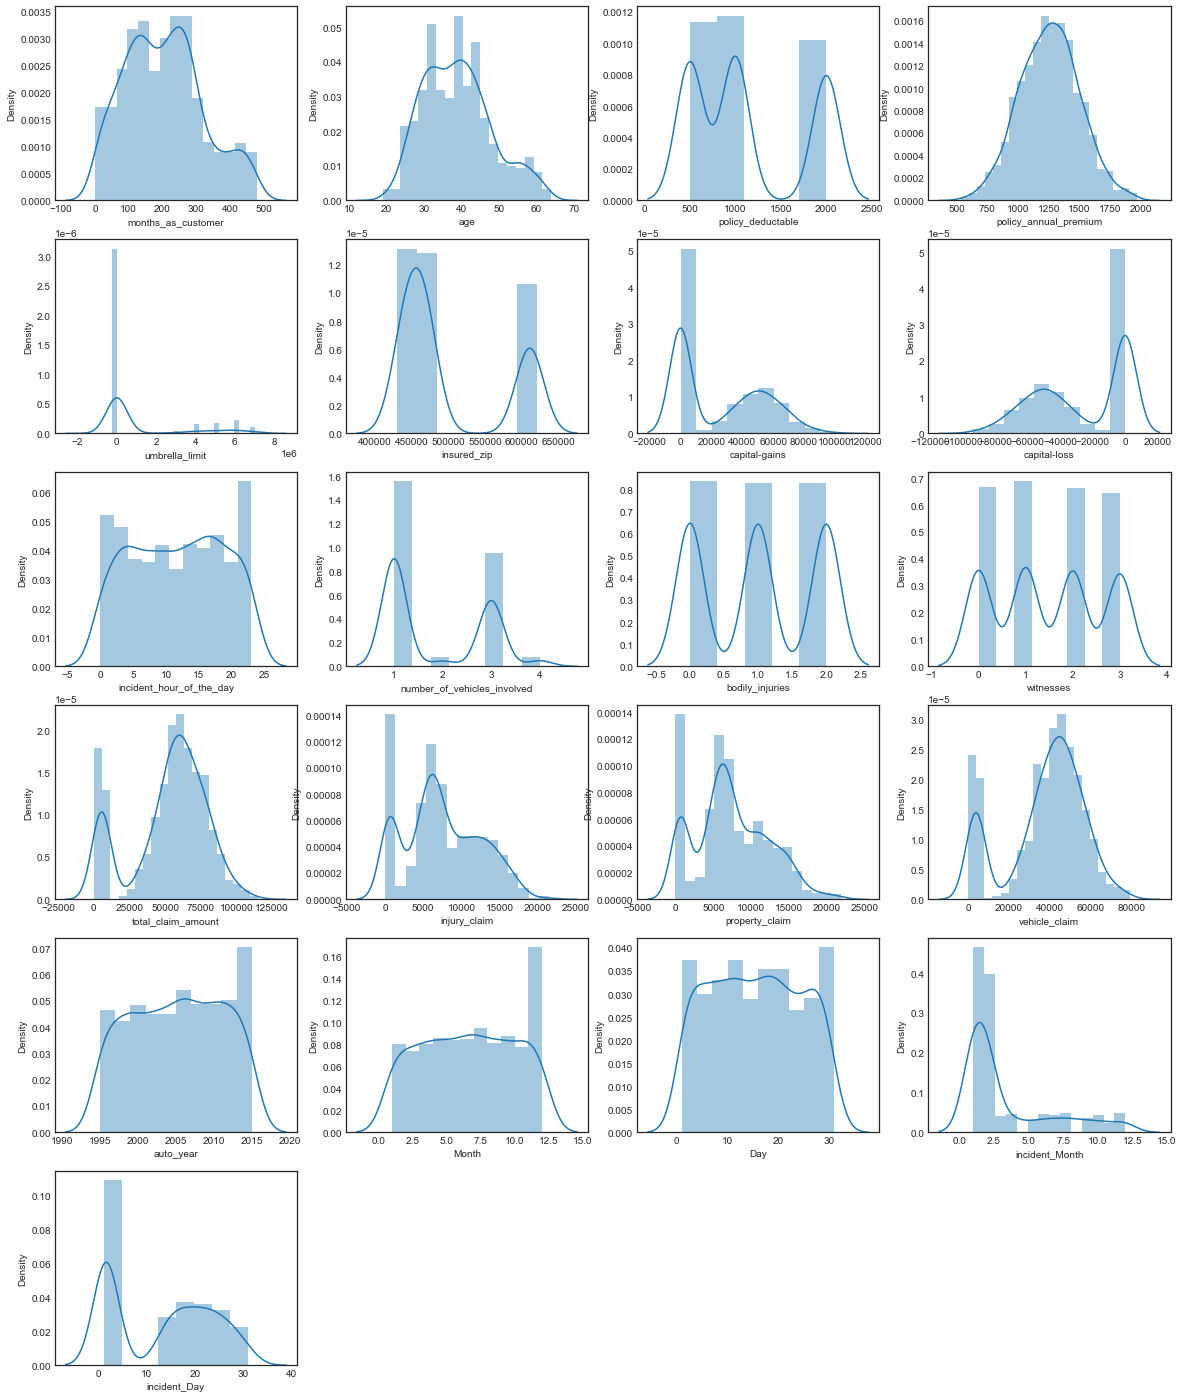

In [58]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in number_datatype:
    if plot<=22:
        plt.subplot(6,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

### Below are skewed columns as I can observe

* months_as_customer
* age
* policy_deductable
* umbrella_limit
* insured_zip
* capital-gains
* capital-loss
* number_of_vehicles_involved
* total_claim_amount
* vehicle_claim
* incident_Month

# Removing Skewness using yeo-johnson method

In [59]:
skewed_features = ['months_as_customer','age','policy_deductable','umbrella_limit','insured_zip','capital-gains','capital-loss','number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_Month']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [60]:
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

months_as_customer       age  policy_deductable  umbrella_limit  \
0            1.044541  1.002330           0.063154       -0.337086   
1            0.299045  0.427171           1.271808        1.482455   
2           -0.515819 -1.136013           1.271808        1.482455   
3            0.517526  0.324015           1.271808        1.788485   
4            0.299045  0.626869           0.063154        1.788485   

    insured_zip  capital-gains  capital-loss  number_of_vehicles_involved  \
0 -5.551115e-16       1.028989      1.048516                    -0.839387   
1 -4.996004e-16      -0.986627      1.048516                    -0.839387   
2 -1.720846e-15       0.955106      1.048516                     1.194880   
3  2.164935e-15       1.013773     -1.006291                    -0.839387   
4  2.164935e-15       1.066686     -0.941672                    -0.839387   

   total_claim_amount  vehicle_claim  incident_Month  
0            0.720163       0.758130       -1.100637  
1           -1.778146      -1.787485       -1.100637  
2           -0.715924      -0.820246       -0.021968  
3            0.395030       0.681832        1.557258  
4           -1.730904      -1.740862       -0.021968

<function matplotlib.pyplot.show(close=None, block=None)>

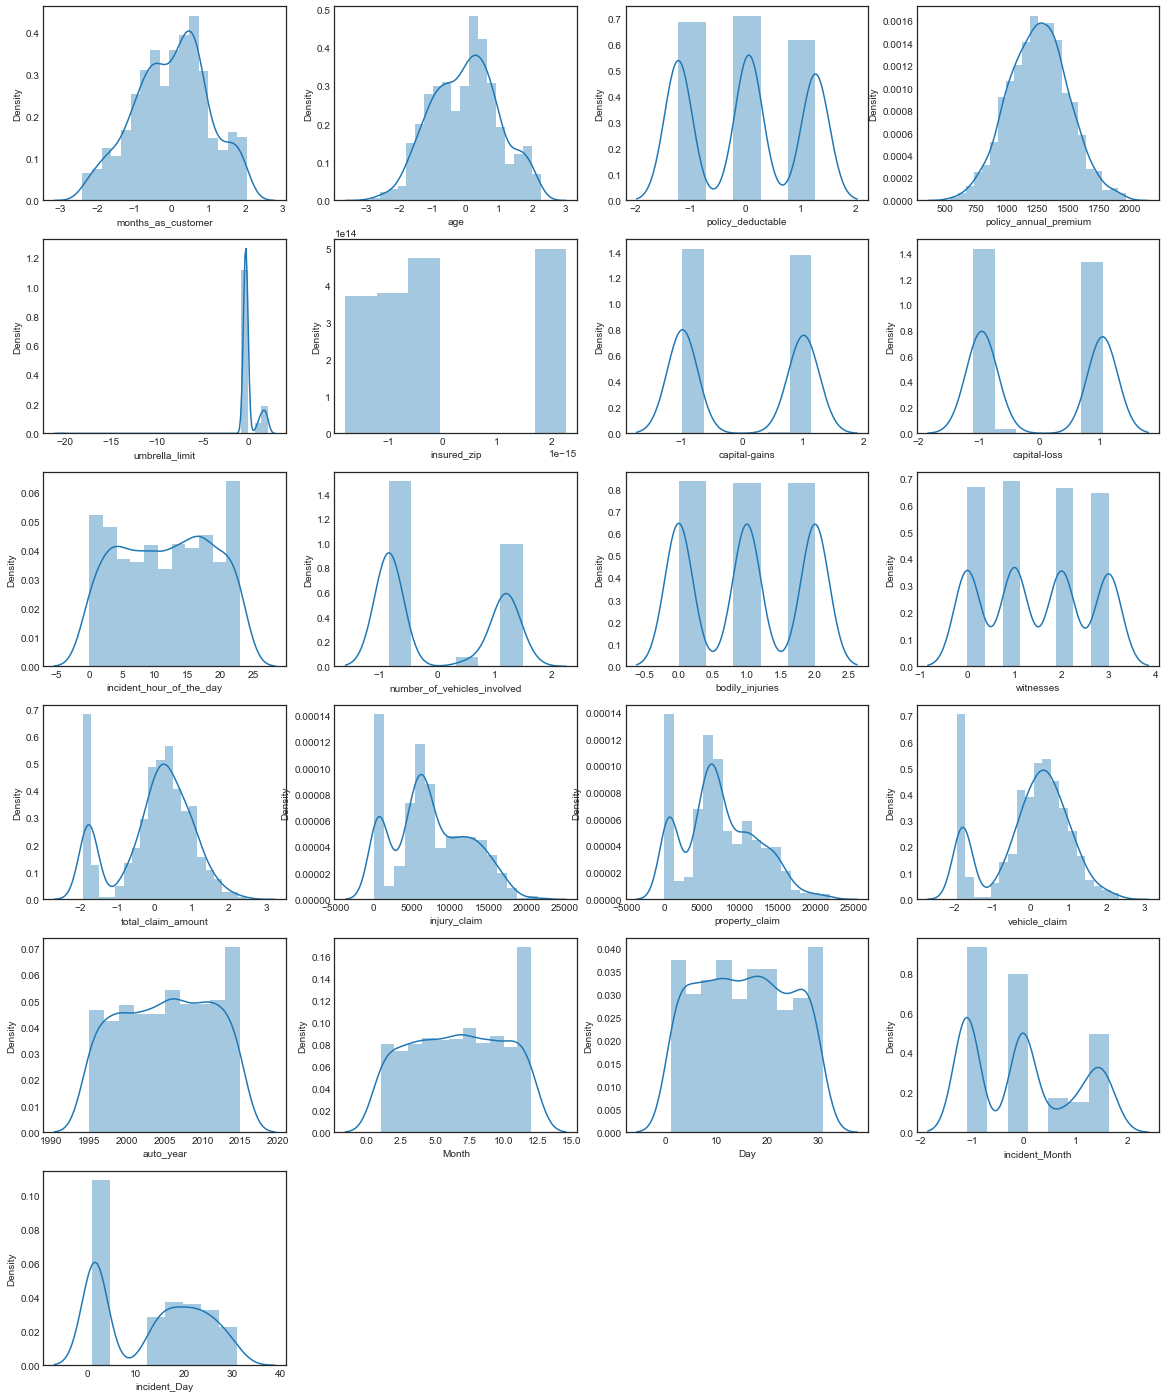

In [61]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in number_datatype:
    if plot<=22:
        plt.subplot(6,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

## Outliers and skewness are removed now and we are ready to define X and Y

In [62]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
x.shape

(980, 36)

In [63]:
y.shape

(980,)

We have see in visualization part about class imbalanec which we need to treat before processing

In [64]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

# SMOT for oversampling

In [65]:
# adding samples to make all the categorical label values same
from imblearn.over_sampling import SMOTE # importing SMOT
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [66]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

Our classes are baalancesd now that means we have added dummy information.

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler # Using standard scaller

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.086265  1.051720      1.353245    0.234426           0.040820   
1            0.299301  0.447775      0.091240    0.234426           1.311387   
2           -0.560890 -1.193644      1.353245   -1.079781           1.311387   
3            0.529934  0.339455     -1.170766    0.234426           1.311387   
4            0.299301  0.657467     -1.170766    1.548633           0.040820   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.659089       -0.403986    -0.422330     1.274407   
1              -0.264759        1.608405    -0.381038     1.274407   
2               0.686537        1.608405    -1.289465    -0.784679   
3               0.697992        1.946872     1.600985    -0.784679   
4               1.438912        1.946872     1.600985     1.274407   

   insured_education_level  ...  total_claim_amount  injury_claim  \
0                 0.642404  ...            0.656305     -0.257660   
1                 0.642404  ...           -1.974114     -1.456719   
2                 1.732097  ...           -0.855722     -0.008640   
3                 1.732097  ...            0.313980     -0.293234   
4                -1.536983  ...           -1.924372     -1.347903   

   property_claim  vehicle_claim  auto_make  auto_year     Month       Day  \
0        1.108212       0.696561   0.982787  -0.166340  1.138173  0.146211   
1       -1.472890      -1.992540   0.462571   0.364609 -0.096342  1.343074   
2       -0.825506      -0.970781  -0.577862   0.364609 -0.096342 -0.811279   
3       -0.300429       0.615962  -0.837970   1.603490 -0.404971  1.103701   
4       -1.500304      -1.943289  -1.618294   0.718575 -0.096342 -1.170338   

   incident_Month  incident_Day  
0       -1.161252      1.263092  
1       -1.161252      0.858071  
2       -0.030424      0.959326  
3        1.625165     -1.167036  
4       -0.030424      0.453049  

[5 rows x 36 columns]

We did above feature Scalling to avoid distance bias between values and calculation of them

# Finding best random stage

In [80]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [81]:
maxAcc = 0
maxRS = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.7452394000365832 on Random State: 44


We have our best random state is 44 which is giving us 74 accuracy

# Feature importance

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                               
incident_severity                 0.186
insured_zip                       0.041
insured_hobbies                   0.039
vehicle_claim                     0.038
total_claim_amount                0.037
capital-loss                      0.037
property_claim                    0.035
collision_type                    0.031
injury_claim                      0.031
capital-gains                     0.029
Day                               0.027
policy_annual_premium             0.027
incident_state                    0.026
incident_hour_of_the_day          0.025
age                               0.025
months_as_customer                0.025
incident_Day                      0.024
Month                             0.024
incident_Month                    0.023
policy_csl                        0.022
auto_make                         0.022
auto_year                         0.022
number_of_vehicles_involved       0.021
policy_deductable                 0.021
authorities_contacted             0.018
police_report_available           0.017
umbrella_limit                    0.017
insured_relationship              0.016
incident_city                     0.016
insured_education_level           0.016
witnesses                         0.015
policy_state                      0.012
incident_type                     0.010
property_damage                   0.010
bodily_injuries                   0.008
insured_sex                       0.008

## Tarining all classification models now

I have defined one function which I will use now to implement all possible classification model and compare matrix for them. Finaly we will select and save one best model

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=44)

In [84]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()
Gbc=GradientBoostingClassifier()
BG=BaggingClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT,Gbc,BG]


for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[117  25]
 [ 26 128]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.84      0.83      0.83       154

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296

Accuracy score : 0.8277027027027027
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[126  16]
 [ 19 135]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.89      0.88       142
           1       0.89      0.88      0.89       154

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       2

In [85]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN,EXT,Gbc,BG]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.68581081 0.75675676 0.83445946 0.80743243 0.85810811]
0.7885135135135135
0.06143077369016596


Cross_Validation_score of RandomForestClassifier() is
[0.73986486 0.81756757 0.91891892 0.91891892 0.94256757]
0.8675675675675676
0.07708035138580356


Cross_Validation_score of DecisionTreeClassifier() is
[0.71621622 0.80067568 0.85810811 0.875      0.84459459]
0.818918918918919
0.056957495718128644


Cross_Validation_score of SVC() is
[0.69256757 0.76013514 0.89864865 0.9222973  0.9222973 ]
0.8391891891891892
0.09497029638277892


Cross_Validation_score of KNeighborsClassifier() is
[0.65540541 0.65202703 0.69594595 0.69932432 0.69256757]
0.6790540540540541
0.020825722983003322


Cross_Validation_score of ExtraTreesClassifier() is
[0.73310811 0.80743243 0.93581081 0.94256757 0.93581081]
0.870945945945946
0.08553103999160357


Cross_Validation_score of GradientBoostingClassifier() is
[0.72635135 0.83108108 0.90540541 0.925

In [86]:
#Checking difference between accuracy score and cross validation score

Models=["LOGR","RFC","DTC","SV","KNN","EXT","Gbc","BG"]
Accuracy=[82,88,85,86,65,89,91,90]
Cross_va=[78,86,81,83,67,87,86,86]

In [87]:
# Finding difference

score_diff=[]
for i in range(len(Accuracy)):
    score_diff.append(Accuracy[i]-Cross_va[i])

In [88]:
models=pd.DataFrame({})
models["Models"]=Models#
models["Accuracy"]=Accuracy
models["Cross_va"]=Cross_va
models["Differance"]=score_diff
models

Models  Accuracy  Cross_va  Differance
0   LOGR        82        78           4
1    RFC        88        86           2
2    DTC        85        81           4
3     SV        86        83           3
4    KNN        65        67          -2
5    EXT        89        87           2
6    Gbc        91        86           5
7     BG        90        86           4

We can see that ExtraTreesClassifier is working well because diffrence between accuracy score and cross validation in 2 which is Minimum difference among all models we have train

## Hyper Parameter Tuning for ExtraTreesClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

EXT.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
parameters= {'n_estimators':[10,50,100],
             'criterion':['gini', 'entropy'],
             'max_depth':[1, 2,34,None],
            'min_samples_split':[2, 8, 34],
            'min_samples_leaf':[1, 2,34],
            'max_features': ['auto', 'sqrt', 'log2',],
            'max_leaf_nodes':[2, 5, 8,55]}

In [92]:
GVC=GridSearchCV(ExtraTreesClassifier(),parameters,cv=3)

In [93]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 34, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5, 8, 55],
                         'min_samples_leaf': [1, 2, 34],
                         'min_samples_split': [2, 8, 34],
                         'n_estimators': [10, 50, 100]})

In [94]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': 55,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [109]:
Final_Model = ExtraTreesClassifier(criterion='entropy',
 max_depth=None,
 max_features='sqrt',
 max_leaf_nodes=300,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=100)


In [110]:
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.1891891891892


#### When I used best paramenter suggested by gridsearchcv I got accuracy upto 84% and it was less than deafult parameters. then I Increased MAX_leaf_nodes up to 300 and got good accuracy of 89 %

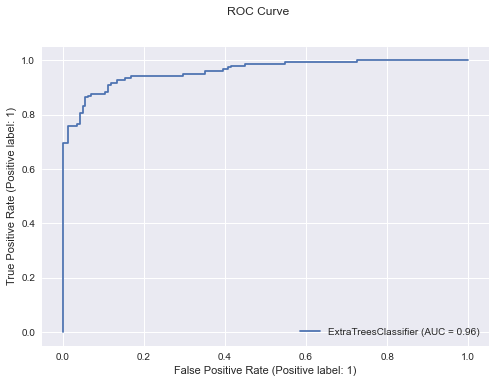

In [111]:
from sklearn import metrics
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

### As we can see ROC curve is giving us 96% of accuracy which is good

## Confusion Matrix

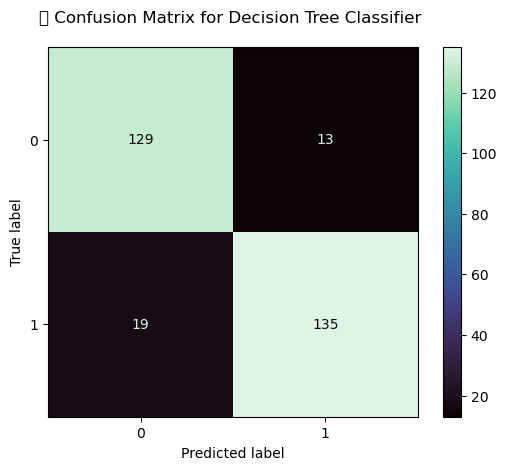

In [112]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

**Observation**

* 129 True positive
* 13  False Postitive
* 19  False negative
* 135 True Negative


# Saving Final model

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model ,"Insur_fraud")

['Insur_fraud']

### Lets use model to predict again

In [115]:
# Loading the saved model
model=joblib.load("Insur_fraud")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [116]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

Original  Predicted
0           1          1
1           0          1
2           0          1
3           0          0
4           0          0
..        ...        ...
291         1          1
292         0          1
293         1          0
294         0          1
295         1          1

[296 rows x 2 columns]

# Thank You